In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# import necessary libraries

# load train and test vectors from folder
train_vectors = np.load('train_image_vectors (1).npy')
test_vectors = np.load('test_image_vectors (1).npy')

In [15]:
train_labels = np.zeros((train_vectors.shape[0], 1))
train_labels[706:] = 1

test_labels = np.zeros((test_vectors.shape[0], 1))
test_labels[200:] = 1

In [3]:
train_vectors.shape

(1422, 4096)

In [ ]:
# Get scatter plot between features and labels to see if there is any correlation



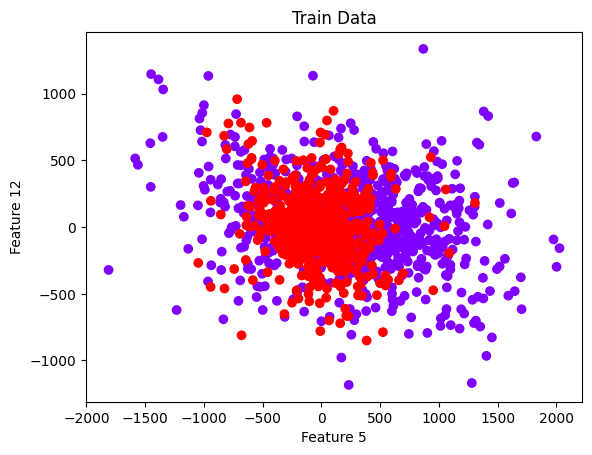

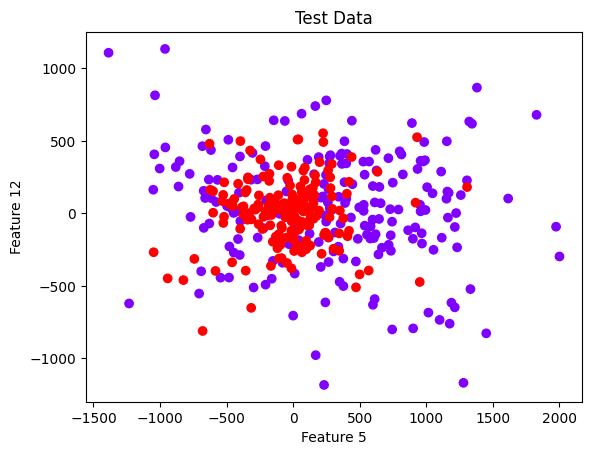

In [16]:
# Get scatter plot of train data for specific features
import matplotlib.pyplot as plt
plt.scatter(train_vectors[:, 5], train_vectors[:, 12], c=train_labels, cmap='rainbow')
plt.title('Train Data')
plt.xlabel('Feature 5')
plt.ylabel('Feature 12')
plt.show()

# Get scatter plot of test data for specific features
plt.scatter(test_vectors[:, 5], test_vectors[:, 12], c=test_labels, cmap='rainbow')
plt.title('Test Data')
plt.xlabel('Feature 5')
plt.ylabel('Feature 12')
plt.show()

Text(0, 0.5, 'Variance')

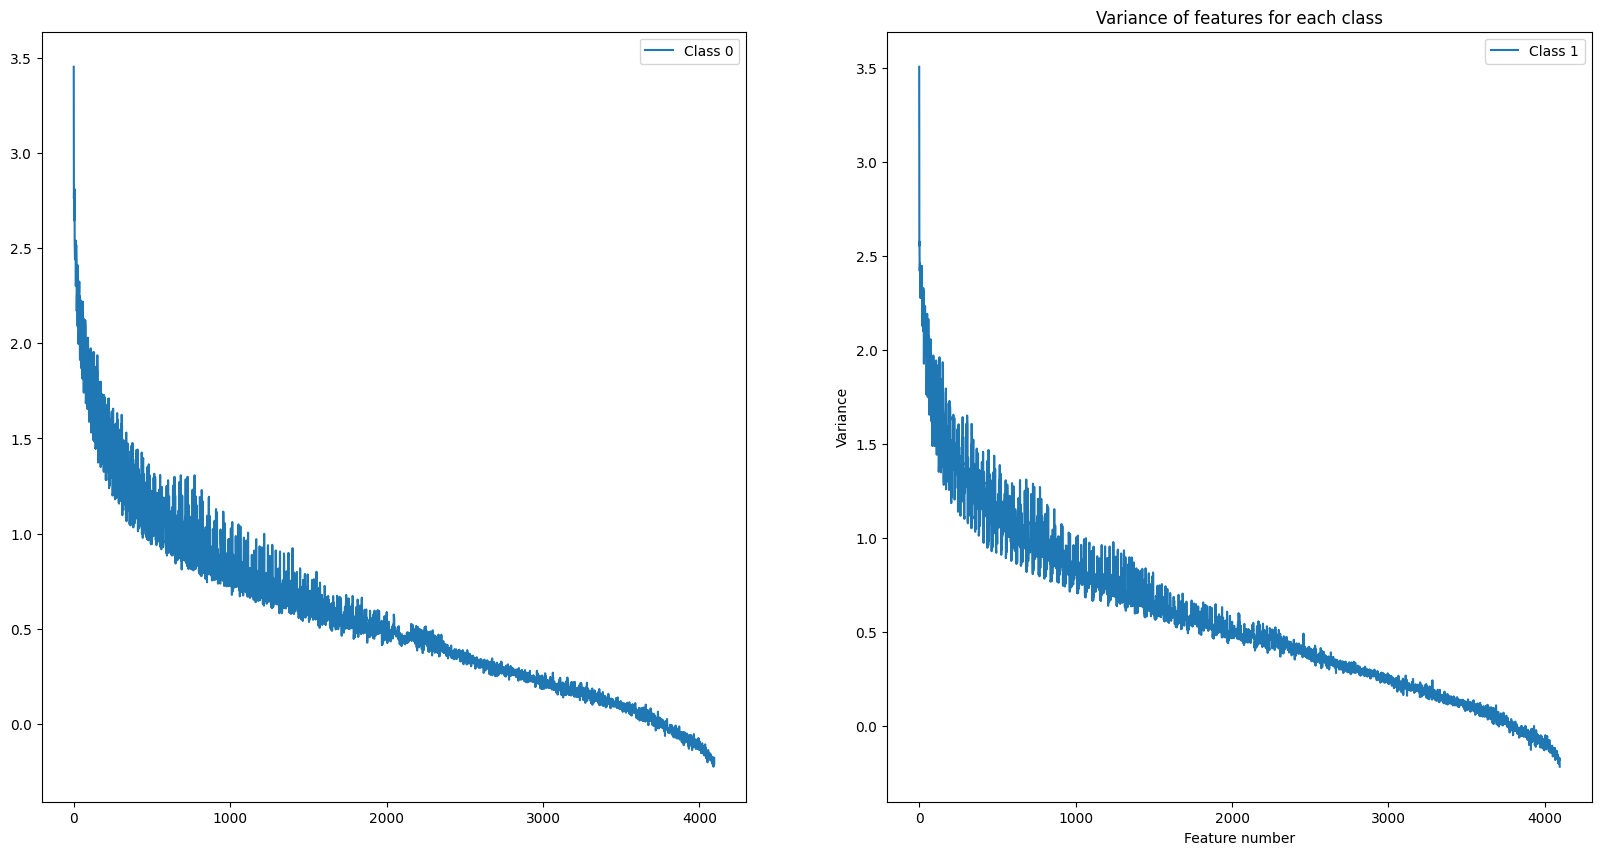

In [17]:
# Plot the variance of each feature in train data for each class as subplots

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(np.log10(train_vectors[:706].std(axis=0)), label='Class 0')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(np.log10(train_vectors[706:].std(axis=0)), label='Class 1')
plt.legend()
plt.title('Variance of features for each class')
plt.xlabel('Feature number')
plt.ylabel('Variance')

In [18]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(train_vectors, train_labels)

# Predict labels for test data
pred_labels = clf.predict(test_vectors)

# Calculate accuracy
accuracy = accuracy_score(test_labels, pred_labels)
print('Accuracy: ', accuracy)

# Save the model
import pickle
filename = 'GFT_RF.sav'
pickle.dump(clf, open(filename, 'wb'))

C:\Users\Owner\AppData\Local\Temp\ipykernel_27556\2562695904.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_vectors, train_labels)


Accuracy:  0.9921052631578947


In [19]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, pred_labels))

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels))

[[197   3]
 [  0 180]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       200
         1.0       0.98      1.00      0.99       180

    accuracy                           0.99       380
   macro avg       0.99      0.99      0.99       380
weighted avg       0.99      0.99      0.99       380



In [20]:
# Get important features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(10):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. Feature 5 (0.032048)
2. Feature 4 (0.022493)
3. Feature 2 (0.015932)
4. Feature 15 (0.006159)
5. Feature 71 (0.005033)
6. Feature 187 (0.004999)
7. Feature 1 (0.004501)
8. Feature 3 (0.004467)
9. Feature 10 (0.003510)
10. Feature 8 (0.003489)


In [21]:
indices[0:50]

array([  5,   4,   2,  15,  71, 187,   1,   3,  10,   8,  87,  86, 261,
        22,  33, 262,  34, 167, 101, 235, 215, 265, 159, 234, 166, 429,
       240,  12, 204,  16, 203,  72, 536, 217, 301, 422, 256, 586,   6,
        26, 521, 188, 214,  38, 299,  85,  45, 119, 571, 163], dtype=int64)

In [79]:
# load eigen vectors
eigen_vectors = np.load('Eigenvectors_new.npy')

In [80]:
train_vectors = np.load('train_image_vectors.npy')
test_vectors = np.load('test_image_vectors.npy')
# Create a boolean mask
# mask = np.zeros(train_vectors.shape[1], dtype=bool)
# mask[indices[0:50]] = True

# # Use the mask to set elements not in indices[0:5] to 0
# train_vectors[:, ~mask] = 0
# test_vectors[:, ~mask] = 0

In [81]:
out = np.matmul(eigen_vectors, test_vectors.T)

In [89]:
np.abs(out)

array([[ 13.12024097,   8.28129883,   5.51747251, ...,  13.97067677,
         18.97170431,  35.00551737],
       [ 27.78622797,  27.12305597,  39.14881679, ...,  24.48388318,
         17.17346493,  31.40666368],
       [ 15.19433771,   4.30680193,  33.1421972 , ...,  20.33841454,
          8.82873484,  31.60737877],
       ...,
       [ 61.77273492, 142.63393092, 134.88334247, ..., 199.83413178,
        186.45538031, 194.12804608],
       [ 61.77273492, 142.63393092, 134.88334247, ..., 199.83413178,
        186.45538031, 194.12804608],
       [ 25.92233486,  13.45815054,  12.29073526, ...,  19.02181364,
         32.72452027,  19.15396839]])

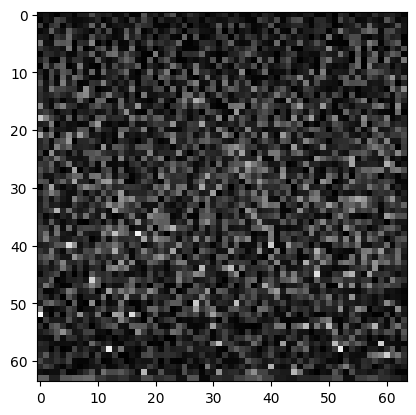

In [87]:
# Reshape each row to 64x64 matrix
rec = out[:, 3].reshape(64, 64)
#get real part of the image
rec = np.abs(rec)
# Plot the reconstructed image
plt.imshow(rec, cmap='gray')
plt.show()

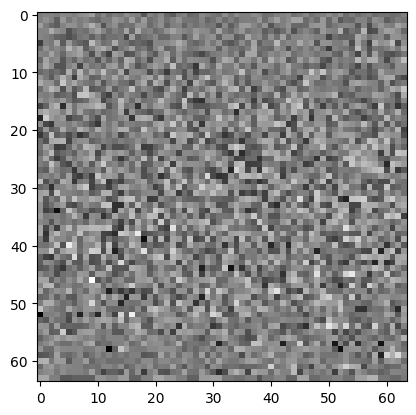

In [86]:
# Reshape each row to 64x64 matrix
rec = out[:, 371].reshape(64, 64)
rec = np.real(rec)
# Plot the reconstructed image
plt.imshow(rec, cmap='gray')
plt.show()